# Breast Cancer Classification using ANN 

DATA:
    The dataset is downloaded from kaggle. The description of the dataset is as written on kaggle.
    
    Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Reading in the data

df=pd.read_csv('../DATA/cancer_classification.csv')

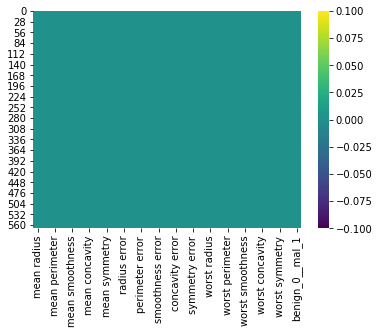

In [4]:
sns.heatmap(df.isnull(),cmap='viridis') # NO MISSING VALUES

In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


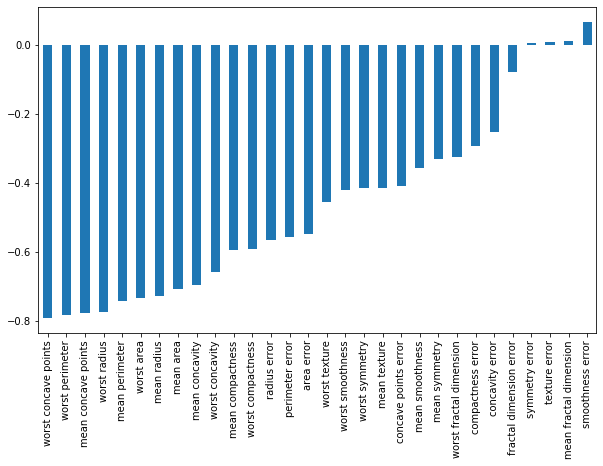

In [7]:
# CORRELATION VALUES OF THE FEATURES WITH RESPECT TO THE TARGET VARIABLE 

df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar',figsize=(10,6)) 

In [8]:
X=df.drop('benign_0__mal_1',axis=1).values  # Creating the feature matrix

In [9]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
y=df['benign_0__mal_1'].values  # Target matrix

* Splitting the feature matrices into training and testing dataset 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state =101)

In [16]:
from sklearn.preprocessing import MinMaxScaler

* Feature Scaling

In [17]:
scaler = MinMaxScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

* BUILDING THE NEURAL NETWORK

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [21]:
model = Sequential()

In [22]:
# One hidden layer of 15 units is used

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [23]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6614 - val_loss: 0.6443
Epoch 2/600
426/426 [==============================] - 0s 118us/sample - loss: 0.6260 - val_loss: 0.6085
Epoch 3/600
426/426 [==============================] - 0s 118us/sample - loss: 0.5884 - val_loss: 0.5727
Epoch 4/600
426/426 [==============================] - 0s 121us/sample - loss: 0.5525 - val_loss: 0.5327
Epoch 5/600
426/426 [==============================] - 0s 123us/sample - loss: 0.5115 - val_loss: 0.4867
Epoch 6/600
426/426 [==============================] - 0s 82us/sample - loss: 0.4618 - val_loss: 0.4318
Epoch 7/600
426/426 [==============================] - 0s 120us/sample - loss: 0.4103 - val_loss: 0.3843
Epoch 8/600
426/426 [==============================] - 0s 130us/sample - loss: 0.3649 - val_loss: 0.3415
Epoch 9/600
426/426 [==============================] - 0s 145us/sample - loss: 0.3275 - val_loss: 0.3014
Epoch 10/600

426/426 [==============================] - 0s 241us/sample - loss: 0.0496 - val_loss: 0.1378
Epoch 79/600
426/426 [==============================] - 0s 235us/sample - loss: 0.0497 - val_loss: 0.1431
Epoch 80/600
426/426 [==============================] - 0s 274us/sample - loss: 0.0494 - val_loss: 0.1408
Epoch 81/600
426/426 [==============================] - 0s 249us/sample - loss: 0.0499 - val_loss: 0.1393
Epoch 82/600
426/426 [==============================] - 0s 227us/sample - loss: 0.0495 - val_loss: 0.1416
Epoch 83/600
426/426 [==============================] - 0s 242us/sample - loss: 0.0483 - val_loss: 0.1413
Epoch 84/600
426/426 [==============================] - 0s 220us/sample - loss: 0.0478 - val_loss: 0.1421
Epoch 85/600
426/426 [==============================] - 0s 223us/sample - loss: 0.0490 - val_loss: 0.1431
Epoch 86/600
426/426 [==============================] - 0s 243us/sample - loss: 0.0476 - val_loss: 0.1437
Epoch 87/600
426/426 [==============================] - 0s 

Epoch 155/600
426/426 [==============================] - 0s 237us/sample - loss: 0.0326 - val_loss: 0.1739
Epoch 156/600
426/426 [==============================] - 0s 283us/sample - loss: 0.0317 - val_loss: 0.1793
Epoch 157/600
426/426 [==============================] - 0s 170us/sample - loss: 0.0341 - val_loss: 0.1735
Epoch 158/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0376 - val_loss: 0.1807
Epoch 159/600
426/426 [==============================] - 0s 201us/sample - loss: 0.0330 - val_loss: 0.1798
Epoch 160/600
426/426 [==============================] - 0s 188us/sample - loss: 0.0321 - val_loss: 0.1777
Epoch 161/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0322 - val_loss: 0.1833
Epoch 162/600
426/426 [==============================] - 0s 170us/sample - loss: 0.0321 - val_loss: 0.1861
Epoch 163/600
426/426 [==============================] - 0s 187us/sample - loss: 0.0317 - val_loss: 0.1812
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 70us/sample - loss: 0.0230 - val_loss: 0.2184
Epoch 232/600
426/426 [==============================] - 0s 71us/sample - loss: 0.0257 - val_loss: 0.2244
Epoch 233/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0225 - val_loss: 0.2099
Epoch 234/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0215 - val_loss: 0.2190
Epoch 235/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0206 - val_loss: 0.2213
Epoch 236/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0217 - val_loss: 0.2237
Epoch 237/600
426/426 [==============================] - 0s 97us/sample - loss: 0.0216 - val_loss: 0.2167
Epoch 238/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0210 - val_loss: 0.2263
Epoch 239/600
426/426 [==============================] - 0s 93us/sample - loss: 0.0214 - val_loss: 0.2181
Epoch 240/600
426/426 [==============================] - 0s

426/426 [==============================] - 0s 235us/sample - loss: 0.0136 - val_loss: 0.2667
Epoch 308/600
426/426 [==============================] - 0s 217us/sample - loss: 0.0159 - val_loss: 0.2605
Epoch 309/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0130 - val_loss: 0.2634
Epoch 310/600
426/426 [==============================] - 0s 232us/sample - loss: 0.0133 - val_loss: 0.2616
Epoch 311/600
426/426 [==============================] - 0s 186us/sample - loss: 0.0141 - val_loss: 0.2628
Epoch 312/600
426/426 [==============================] - 0s 213us/sample - loss: 0.0160 - val_loss: 0.2926
Epoch 313/600
426/426 [==============================] - 0s 189us/sample - loss: 0.0150 - val_loss: 0.2619
Epoch 314/600
426/426 [==============================] - 0s 202us/sample - loss: 0.0132 - val_loss: 0.2815
Epoch 315/600
426/426 [==============================] - 0s 189us/sample - loss: 0.0168 - val_loss: 0.2731
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 215us/sample - loss: 0.0089 - val_loss: 0.3198
Epoch 384/600
426/426 [==============================] - 0s 222us/sample - loss: 0.0095 - val_loss: 0.3326
Epoch 385/600
426/426 [==============================] - 0s 220us/sample - loss: 0.0169 - val_loss: 0.3173
Epoch 386/600
426/426 [==============================] - 0s 190us/sample - loss: 0.0089 - val_loss: 0.3181
Epoch 387/600
426/426 [==============================] - 0s 213us/sample - loss: 0.0086 - val_loss: 0.3233
Epoch 388/600
426/426 [==============================] - 0s 235us/sample - loss: 0.0085 - val_loss: 0.3170
Epoch 389/600
426/426 [==============================] - 0s 205us/sample - loss: 0.0078 - val_loss: 0.3253
Epoch 390/600
426/426 [==============================] - 0s 200us/sample - loss: 0.0078 - val_loss: 0.3223
Epoch 391/600
426/426 [==============================] - 0s 235us/sample - loss: 0.0082 - val_loss: 0.3289
Epoch 392/600
426/426 [============================

Epoch 460/600
426/426 [==============================] - 0s 197us/sample - loss: 0.0065 - val_loss: 0.4150
Epoch 461/600
426/426 [==============================] - 0s 197us/sample - loss: 0.0072 - val_loss: 0.3630
Epoch 462/600
426/426 [==============================] - 0s 193us/sample - loss: 0.0051 - val_loss: 0.3799
Epoch 463/600
426/426 [==============================] - 0s 213us/sample - loss: 0.0056 - val_loss: 0.3719
Epoch 464/600
426/426 [==============================] - 0s 206us/sample - loss: 0.0051 - val_loss: 0.3780
Epoch 465/600
426/426 [==============================] - 0s 213us/sample - loss: 0.0056 - val_loss: 0.3689
Epoch 466/600
426/426 [==============================] - 0s 238us/sample - loss: 0.0051 - val_loss: 0.3706
Epoch 467/600
426/426 [==============================] - 0s 221us/sample - loss: 0.0051 - val_loss: 0.3784
Epoch 468/600
426/426 [==============================] - 0s 291us/sample - loss: 0.0055 - val_loss: 0.3661
Epoch 469/600
426/426 [==============

426/426 [==============================] - 0s 193us/sample - loss: 0.0034 - val_loss: 0.4184
Epoch 537/600
426/426 [==============================] - 0s 231us/sample - loss: 0.0037 - val_loss: 0.4277
Epoch 538/600
426/426 [==============================] - 0s 209us/sample - loss: 0.0035 - val_loss: 0.4495
Epoch 539/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0037 - val_loss: 0.4278
Epoch 540/600
426/426 [==============================] - 0s 195us/sample - loss: 0.0033 - val_loss: 0.4351
Epoch 541/600
426/426 [==============================] - 0s 186us/sample - loss: 0.0031 - val_loss: 0.4329
Epoch 542/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0034 - val_loss: 0.4234
Epoch 543/600
426/426 [==============================] - 0s 168us/sample - loss: 0.0042 - val_loss: 0.4382
Epoch 544/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0055 - val_loss: 0.4928
Epoch 545/600
426/426 [============================

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
losses

,loss,val_loss
0,0.661390,0.644272
1,0.626036,0.608467
2,0.588368,0.572721
3,0.552461,0.532735
4,0.511508,0.486719
...,...,...
595,0.002179,0.466089
596,0.002152,0.476671
597,0.002167,0.479445
598,0.002334,0.470355


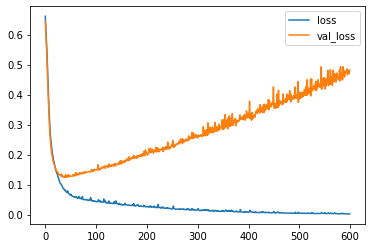

In [26]:
losses.plot()  # Plotting the training loss and validation loss
               # The training loss keeps on decreasing past the validation loss - THIS SIGNIFIES OVERFITTING

In [27]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
#EARLY STOPPING IS USED TO REMOVE OVERFITTING

early_stop = EarlyStopping(monitor = 'val_loss', mode='min', verbose=1, patience=25)

In [30]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6811 - val_loss: 0.6740
Epoch 2/600
426/426 [==============================] - 0s 117us/sample - loss: 0.6542 - val_loss: 0.6443
Epoch 3/600
426/426 [==============================] - 0s 123us/sample - loss: 0.6149 - val_loss: 0.6054
Epoch 4/600
426/426 [==============================] - 0s 157us/sample - loss: 0.5792 - val_loss: 0.5694
Epoch 5/600
426/426 [==============================] - 0s 118us/sample - loss: 0.5442 - val_loss: 0.5337
Epoch 6/600
426/426 [==============================] - 0s 100us/sample - loss: 0.5078 - val_loss: 0.4920
Epoch 7/600
426/426 [==============================] - 0s 157us/sample - loss: 0.4669 - val_loss: 0.4510
Epoch 8/600
426/426 [==============================] - 0s 146us/sample - loss: 0.4293 - val_loss: 0.4129
Epoch 9/600
426/426 [==============================] - 0s 256us/sample - loss: 0.3948 - val_loss: 0.3739
Epoch 10/60

426/426 [==============================] - 0s 154us/sample - loss: 0.0554 - val_loss: 0.0968
Epoch 79/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0561 - val_loss: 0.1052
Epoch 80/600
426/426 [==============================] - 0s 186us/sample - loss: 0.0544 - val_loss: 0.1025
Epoch 81/600
426/426 [==============================] - 0s 209us/sample - loss: 0.0544 - val_loss: 0.0989
Epoch 82/600
426/426 [==============================] - 0s 195us/sample - loss: 0.0566 - val_loss: 0.1068
Epoch 83/600
426/426 [==============================] - 0s 264us/sample - loss: 0.0568 - val_loss: 0.1007
Epoch 84/600
426/426 [==============================] - 0s 244us/sample - loss: 0.0529 - val_loss: 0.1037
Epoch 85/600
426/426 [==============================] - 0s 201us/sample - loss: 0.0527 - val_loss: 0.0993
Epoch 86/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0535 - val_loss: 0.0995
Epoch 00086: early stopping


In [31]:
model_loss = pd.DataFrame(model.history.history)

In [32]:
model_loss

,loss,val_loss
0,0.681076,0.674039
1,0.654213,0.644259
2,0.614903,0.605371
3,0.579248,0.569355
4,0.544182,0.533656
...,...,...
81,0.056640,0.106750
82,0.056764,0.100653
83,0.052899,0.103734
84,0.052658,0.099278


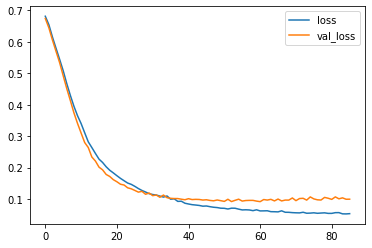

In [33]:
model_loss.plot()  # The training loss and validation loss both decrease upto a point, then validation loss increases.
                   # Overfitting is removed to certain extent but is still present 

In [34]:
from tensorflow.keras.layers import Dropout # DROPOUT LAYER IS USED TO DEAL WITH OVERFITTING

In [35]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [36]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7116 - val_loss: 0.6733
Epoch 2/600
426/426 [==============================] - 0s 87us/sample - loss: 0.6792 - val_loss: 0.6440
Epoch 3/600
426/426 [==============================] - 0s 92us/sample - loss: 0.6461 - val_loss: 0.6211
Epoch 4/600
426/426 [==============================] - 0s 115us/sample - loss: 0.6316 - val_loss: 0.6009
Epoch 5/600
426/426 [==============================] - 0s 103us/sample - loss: 0.6202 - val_loss: 0.5779
Epoch 6/600
426/426 [==============================] - 0s 119us/sample - loss: 0.5939 - val_loss: 0.5516
Epoch 7/600
426/426 [==============================] - 0s 120us/sample - loss: 0.5837 - val_loss: 0.5255
Epoch 8/600
426/426 [==============================] - 0s 130us/sample - loss: 0.5744 - val_loss: 0.5025
Epoch 9/600
426/426 [==============================] - 0s 103us/sample - loss: 0.5306 - val_loss: 0.4776
Epoch 10/600


426/426 [==============================] - 0s 244us/sample - loss: 0.1039 - val_loss: 0.1028
Epoch 79/600
426/426 [==============================] - 0s 242us/sample - loss: 0.1088 - val_loss: 0.0919
Epoch 80/600
426/426 [==============================] - 0s 264us/sample - loss: 0.1030 - val_loss: 0.0911
Epoch 81/600
426/426 [==============================] - 0s 266us/sample - loss: 0.1023 - val_loss: 0.0918
Epoch 82/600
426/426 [==============================] - 0s 290us/sample - loss: 0.1229 - val_loss: 0.0975
Epoch 83/600
426/426 [==============================] - 0s 203us/sample - loss: 0.0996 - val_loss: 0.0926
Epoch 84/600
426/426 [==============================] - 0s 247us/sample - loss: 0.1168 - val_loss: 0.1068
Epoch 85/600
426/426 [==============================] - 0s 225us/sample - loss: 0.1076 - val_loss: 0.1079
Epoch 86/600
426/426 [==============================] - 0s 229us/sample - loss: 0.0975 - val_loss: 0.0909
Epoch 87/600
426/426 [==============================] - 0s 

In [37]:
model_loss = pd.DataFrame(model.history.history)

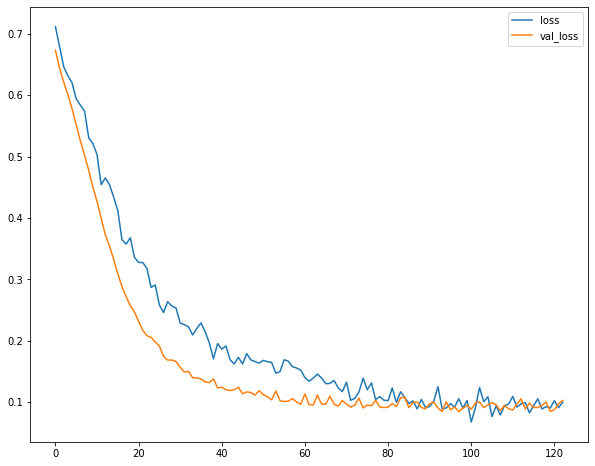

In [38]:
model_loss.plot(figsize=(10,8))    # DROPOUT IMPROVED THE NETWORK BY REMOVING OVERFITTING

* PREDICTIONS

In [39]:
predictions = model.predict_classes(X_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [43]:
print(confusion_matrix(y_test,predictions))   # THE MODEL MISCLASSIFIED 4 DATA POINTS

[[54  1]
 [ 3 85]]


# THE END